In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Chapter 1**

<h2> Parameter Estimation by Optimization

**Least squares by np.polyfit()**

The least squares is the **Process of finding parameter for which the sum of the squares of the residual is minimal**

A Linear degree is a first degree of polynomial ( degree 1 of polynomial is a linear function)

In [2]:
df = pd.read_csv('https://assets.datacamp.com/production/repositories/469/datasets/e079fddb581197780e1a7b7af2aeeff7242535f0/2008_swing_states.csv')

In [3]:
df.head()

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07
3,PA,McKean County,15947,6465,9224,41.21
4,PA,Potter County,7507,2300,5109,31.04


In [4]:
slope , intercept = np.polyfit(
df['total_votes'] , df['dem_share'] , 1
)

In [5]:
slope

4.037071700946573e-05

In [6]:
intercept

40.11391196864175

**Chapter 2**

<h2> Bootstrap confidence intervals generating bootstrap replicas

**Resampling Engine (np.random.choice())**

In [7]:
np.random.choice([1,2,3,4,5] , size = 5)

array([5, 5, 5, 4, 5])

In [8]:
np.random.choice([1,2,3,4,5] , size = 5)

array([4, 1, 2, 5, 5])

**Computing a Bootstrap Replicate**

In [9]:
df_light = pd.read_csv('https://assets.datacamp.com/production/repositories/469/datasets/df23780d215774ff90be0ea93e53f4fb5ebbade8/michelson_speed_of_light.csv')

In [10]:
df_light.head()

,Unnamed: 0,date,distinctness of image,temperature (F),position of deflected image,position of slit,displacement of image in divisions,difference between greatest and least,B,Cor,revolutions per second,radius (ft),value of one turn of screw,velocity of light in air (km/s),remarks
0,0,June 5,3,76,114.85,0.300,114.55,0.17,1.423,-0.132,257.36,28.672,0.99614,299850,Electric light.
1,1,June 7,2,72,114.64,0.074,114.56,0.10,1.533,-0.084,257.52,28.655,0.99614,299740,P.M. Frame inclined at various angles
2,2,June 7,2,72,114.58,0.074,114.50,0.08,1.533,-0.084,257.52,28.647,0.99614,299900,P.M. Frame inclined at various angles
3,3,June 7,2,72,85.91,0.074,85.84,0.12,1.533,-0.084,193.14,28.647,0.99598,300070,P.M. Frame inclined at various angles
4,4,June 7,2,72,85.97,0.074,85.89,O.07,1.533,-0.084,193.14,28.650,0.99598,299930,P.M. Frame inclined at various angles


In [11]:
bs_sample = np.random.choice(

    df_light['velocity of light in air (km/s)'] , size = 100
    
)

**We can also compute any summary statistics**

In [12]:
np.mean(bs_sample)

299855.8

<h3> Bootstrap Confidence Intervals

**Bootstrap Replicate FN**

In [13]:
def bootstrap_replicate_1d(data , func):
    bs_sample = np.random.choice(data , len(data))
    return func(bs_sample)

In [14]:
bootstrap_replicate_1d(df_light['velocity of light in air (km/s)'] , np.mean)

299856.9

**Many bootstrap replicates**

In [15]:
bs_replicates = np.empty(10000)
for i in range(10000):
    bs_replicates[i] = bootstrap_replicate_1d(df_light['velocity of light in air (km/s)'] , np.mean)

Now we have replicates

**Plotting a Histogram of Bootstrap replicates**

/home/karthikeyan/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


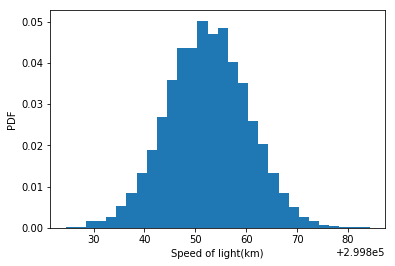

In [16]:
plt.hist(bs_replicates , bins = 30 , normed = True) 
#Normed = True means , this sets the height of the bars of the histogram such that the total area of the bars = 1
plt.xlabel('Speed of light(km)')
plt.ylabel('PDF')
plt.show()

**Bootstrap confidence Interval**

95% confidence interval starts at 2.5% and ends with 97.5% (Coz in first and last 2.5 is not taken into account)

In [17]:
conf_int = np.percentile(bs_replicates , [2.5 , 97.5])

In [18]:
conf_int

array([299836.8, 299867.8])

**Generate a pair bootstrap sample**

In [19]:
np.arange(7)

array([0, 1, 2, 3, 4, 5, 6])

In [20]:
inds = np.arange(len(df['total_votes']))

In [21]:
bs_inds = np.random.choice(inds , len(inds))

In [22]:
bs_total_votes = df['total_votes'][bs_inds]

In [23]:
bs_dem_share = df['dem_share'][bs_inds]

**Computing a Pairs bootstrap replicate**

In [24]:
bs_slope , bs_intercept = np.polyfit(bs_total_votes , bs_dem_share , deg = 1)

In [25]:
bs_slope , bs_intercept

(3.6051983942480814e-05, 40.20166042908843)

In [26]:
np.polyfit(df['total_votes'] , df['dem_share'] , deg = 1)
#Fit of original

array([4.0370717e-05, 4.0113912e+01])

**Please check DataCamp code blocks to get more info**